In [18]:
    list1 = [1,2]
    list2 = [1,3]
    list1_as_set = set(list1)
    intersection = list1_as_set. intersection(list2) #Find common elements of set and list.
    intersection_as_list = list(intersection)
    print(intersection_as_list)

[1]


In [22]:
def common_member(a, b):
    result = [i for i in a if i in b]
    return result
 
a = [[1, 2], [3, 4, 5]]
b = [[1, 2], [5, 6], [7, 8, 9]]
 
print("The common elements in the two lists are: ")
print(common_member(a, b))

The common elements in the two lists are: 
[[1, 2]]


In [14]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set1 = set(['A', 'B', 'C'])
set2 = set(['A', 'B', 'D'])
set3 = set(['A', 'E', 'F'])

venn3([set1, set2, set3], ('Group1', 'Group2', 'Group3'))

plt.show()


ModuleNotFoundError: No module named 'matplotlib_venn'

In [1]:
from nltk.metrics import distance
import scipy.spatial as spatial
import numpy as np
from scipy.cluster.vq import kmeans

# sample vocabulary list
words = ['test', 'text', 'best', 'fast', 'context', 'boost', 'faster', 'border']

# similarity matrix
word_vectors = np.array([
    [
        distance.edit_distance(w, _w)
        for _w in words
    ]
    for w in words
], dtype=np.float)

centroids, _ = kmeans(word_vectors, k_or_guess=3)

word_clusters = np.argmin([
    [spatial.distance.euclidean(wv, cv) for cv in centroids]
    for wv in word_vectors
], 1)

for k in range(centroids.shape[0]):
    print('k =', k)
    print([word for i, word in enumerate(words) if word_clusters[i] == k])

k = 0
['test', 'text', 'best', 'fast', 'boost', 'faster']
k = 1
['context']
k = 2
['border']


<ipython-input-1-309e8b497496>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)


In [13]:
word_clusters
#sns.scatterplot(x = values['OD280'], y = values['Alcohol'], hue=kmeans_wine.labels_)

array([0, 0, 0, 0, 1, 0, 0, 2])

Remarks:

Original vocabulary works as a feature list. The list of distance measures to other words works as a feature vector to any phrase or word.

Each cluster is made in such feature space. Consequently, the distance between two words is not their Levenshtein Distance anymore but it is their distance in such space. This is why we use other measures such as spatial.distance.euclidean.

Kmean produces centroids in this feature space, each word is considered as a member to a cluster if the cluster centroid is the closest to the word (out of all other centroids). np.argmin([...], 1) is finding such assignment for each word.

Other clustering algorithms can be also tested on word-feature space. (List of some clustering algorithms in scikit-learn: https://scikit-learn.org/stable/modules/clustering.html)

In [2]:
k

2

In [3]:
word_clusters

array([0, 0, 0, 0, 1, 0, 0, 2])

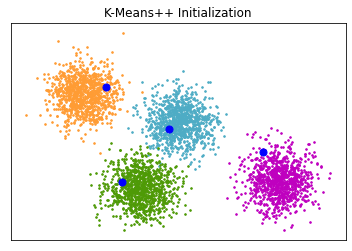

In [4]:
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()


In [5]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")

3387 documents - 4 categories


In [6]:
dataset

{'data': ["My point is that you set up your views as the only way to believe.  Saying \nthat all eveil in this world is caused by atheism is ridiculous and \ncounterproductive to dialogue in this newsgroups.  I see in your posts a \nspirit of condemnation of the atheists in this newsgroup bacause they don'\nt believe exactly as you do.  If you're here to try to convert the atheists \nhere, you're failing miserably.  Who wants to be in position of constantly \ndefending themselves agaist insulting attacks, like you seem to like to do?!\nI'm sorry you're so blind that you didn't get the messgae in the quote, \neveryone else has seemed to.",
  "\nBy '8 grey level images' you mean 8 items of 1bit images?\nIt does work(!), but it doesn't work if you have more than 1bit\nin your screen and if the screen intensity is non-linear.\n\nWith 2 bit per pixel; there could be 1*c_1 + 4*c_2 timing,\nthis gives 16 levels, but they are linear if screen intensity is\nlinear.\nWith 1*c_1 + 2*c_2 it works,

In [7]:
unique_labels

array([0, 1, 2, 3])